<a href="https://colab.research.google.com/github/g-roger/natural-language-process/blob/main/IA_NLP_1_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from collections import Counter

In [ ]:
df = pd.read_csv('https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv', delimiter=';', encoding='utf-8')

In [ ]:
df.head()

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       4080 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  4080 non-null   object
dtypes: object(3)
memory usage: 95.8+ KB


In [ ]:
df.describe()

,nome,descricao,categoria
count,4080,2916,4080
unique,3696,2460,4
top,Mais Escuro - Cinquenta Tons Mais Escuros Pel...,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,maquiagem
freq,20,39,1020


In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       2916 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  2916 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


In [ ]:
dist_categorias = df[['nome', 'categoria']].groupby('categoria').count()

In [ ]:
dist_categorias.rename(columns={'nome': 'quantidade'}, inplace=True)

In [ ]:
dist_categorias['frequencia'] = dist_categorias.apply(lambda x: (x/sum(dist_categorias.quantidade)) * 100)

In [ ]:
dist_categorias

,quantidade,frequencia
categoria,,
brinquedo,668,22.908093
game,622,21.330590
livro,838,28.737997
maquiagem,788,27.023320


In [ ]:
dist_categorias.sum()

quantidade    2916.0
frequencia     100.0
dtype: float64

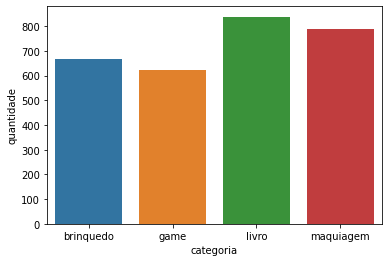

In [ ]:
sns.barplot(x=dist_categorias.index, y=dist_categorias.quantidade)

In [ ]:
df.descricao.values

array(['Produto NovoBilbo Bolseiro é um hobbit que leva uma vida confortável e sem ambições. Mas seu contentamento é perturbado quando Gandalf, o mago, e uma companhia de anões batem à sua porta e levam-no para uma expedição. Eles têm um plano para roubar o tesouro guardado por Smaug, o Magnífico, um grande e perigoso dragão. Bilbo reluta muito em participar da aventura, mas acaba surpreendendo até a si mesmo com sua esperteza e sua habilidade como ladrão!CaracterísticasAutor: Tolkien, J. R. R.Peso: 0.44I.S.B.N.: 9788578277109Altura: 20.000000Largura: 13.000000Profundidade: 1.000000Número de Páginas: 328Idioma: PortuguêsAcabamento: BrochuraNúmero da edição: 7Ano da edição: 2013',
       'Produto NovoDurante as férias escolares de 1958, em Derry, pacata cidadezinha do Maine, Bill, Richie, Stan, Mike, Eddie, Ben e Beverly aprenderam o real sentido da amizade, do amor, da confiança e... do medo. O mais profundo e tenebroso medo. Naquele verão, eles enfrentaram pela primeira vez a Coisa, u

In [ ]:
# df['top_10_palavras_desc'] = df.descricao.apply(lambda x: sorted(Counter(x.split(' ')), reverse=True)[:10])

In [ ]:
df['top_10_palavras_desc'] = df.descricao.apply(lambda x: (Counter(x.split(' ')).most_common(10)))

In [ ]:
df

,nome,descricao,categoria,top_10_palavras_desc,count_cat_na_desc
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,"[(e, 5), (um, 3), (uma, 3), (o, 3), (sua, 3), ...",0
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,"[(a, 7), (de, 6), (o, 5), (eles, 5), (que, 5),...",0
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,"[(de, 8), (e, 7), (dos, 6), (A, 5), (a, 4), (d...",2
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,"[(de, 41), (a, 36), (e, 32), (que, 31), (o, 27...",1
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,"[(de, 20), (a, 11), (que, 10), (o, 6), (uma, 6...",0
...,...,...,...,...,...
4073,Red Dead Redemption Edição Do Ano Goty Xbox 3...,Red Dead Redemption Edição Do Ano Goty Xbox 36...,game,"[(Xbox, 4), (Dead, 3), (Redemption, 3), (Red, ...",0
4074,Jogo Gta 5 Grand Theft Auto V Ps4 Mídia Cd + ...,Game: GTA V - Grand Theft Auto FiveEspecificaç...,game,"[(-, 6), (de, 6), (01, 3), (Idioma, 2), (do, 2...",0
4075,Zelda: Breath Of The Wild - Expansion Pass - ...,ENVIO IMEDIATO APÓS CONFIRMAÇÃOCom este Passe ...,game,"[(para, 5), (o, 5), (e, 5), (de, 4), (uma, 4),...",0
4078,Gta San Andreas Hd Remastered Ps3 Envio Imedi...,Nome do jogo: GTA San Andreas HD RemasterConso...,game,"[(do, 4), (a, 3), (da, 2), (de, 2), (ou, 2), (...",0


In [ ]:
def contar_qtd(x):
  if x[0] in x[1]:
    return x[1].count(x[0])
  return 0

In [ ]:
df['count_cat_na_desc'] = df[['categoria', 'descricao']].apply(contar_qtd, axis=1)

In [ ]:
df

,nome,descricao,categoria,top_10_palavras_desc,count_cat_na_desc
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,"[(e, 5), (um, 3), (uma, 3), (o, 3), (sua, 3), ...",0
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,"[(a, 7), (de, 6), (o, 5), (eles, 5), (que, 5),...",0
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,"[(de, 8), (e, 7), (dos, 6), (A, 5), (a, 4), (d...",2
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,"[(de, 41), (a, 36), (e, 32), (que, 31), (o, 27...",1
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,"[(de, 20), (a, 11), (que, 10), (o, 6), (uma, 6...",0
...,...,...,...,...,...
4073,Red Dead Redemption Edição Do Ano Goty Xbox 3...,Red Dead Redemption Edição Do Ano Goty Xbox 36...,game,"[(Xbox, 4), (Dead, 3), (Redemption, 3), (Red, ...",0
4074,Jogo Gta 5 Grand Theft Auto V Ps4 Mídia Cd + ...,Game: GTA V - Grand Theft Auto FiveEspecificaç...,game,"[(-, 6), (de, 6), (01, 3), (Idioma, 2), (do, 2...",0
4075,Zelda: Breath Of The Wild - Expansion Pass - ...,ENVIO IMEDIATO APÓS CONFIRMAÇÃOCom este Passe ...,game,"[(para, 5), (o, 5), (e, 5), (de, 4), (uma, 4),...",0
4078,Gta San Andreas Hd Remastered Ps3 Envio Imedi...,Nome do jogo: GTA San Andreas HD RemasterConso...,game,"[(do, 4), (a, 3), (da, 2), (de, 2), (ou, 2), (...",0


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import itertools
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [ ]:
df.top_10_palavras_desc

0       [(e, 5), (um, 3), (uma, 3), (o, 3), (sua, 3), ...
1       [(a, 7), (de, 6), (o, 5), (eles, 5), (que, 5),...
2       [(de, 8), (e, 7), (dos, 6), (A, 5), (a, 4), (d...
3       [(de, 41), (a, 36), (e, 32), (que, 31), (o, 27...
4       [(de, 20), (a, 11), (que, 10), (o, 6), (uma, 6...
                              ...                        
4073    [(Xbox, 4), (Dead, 3), (Redemption, 3), (Red, ...
4074    [(-, 6), (de, 6), (01, 3), (Idioma, 2), (do, 2...
4075    [(para, 5), (o, 5), (e, 5), (de, 4), (uma, 4),...
4078    [(do, 4), (a, 3), (da, 2), (de, 2), (ou, 2), (...
4079    [(de, 12), (o, 8), (com, 6), (e, 5), (que, 4),...
Name: top_10_palavras_desc, Length: 2916, dtype: object

In [ ]:
text = list(df.top_10_palavras_desc)
text = itertools.chain(*text)

text = list(text)

In [ ]:
words = [] 
for i in list(text):
    words.append(i[0])

In [ ]:
text = ' '.join(words)

In [ ]:
text

'e um uma o sua da é de para edição: a de o eles que em do e da os de e dos A a do ao Crônicas Gelo Fogo de a e que o Harry Potter um é da de a que o uma e para da do Langdon de e a sua o  que Christian Grey não de ao da dos mais Produto NovoO Silmarillion, relata acontecimentos de um e que adultos com livro para O Pequeno de em mais Lorraine do que e dos da é a de um e que em do uma O da a do de os entrega da é MATERIAL DIGITAL Coleção de a e o eles que em do os Derry, DE ORGANIZADOS DO EM O NO CAMPO PERGUNTAS E TAMBEM the and de Journal with of Produto Novo e Físico e de para que uma Ninja AUTO-IQ sua alimentação dos de a o e uma um da jeitos usar boca de e que é um a em do o depois de uma um é e o que ele - tem de a que e o da em se Maddox uma de e a um para uma em o ou dia de o que – e uma do a John autor de a e o que em no é qual mundo de do a o que e não A Mia com de a por O diário John dos Para que Dean, de e o a é em uma da do que e que em uma para um é eles a Basta de x Produt

In [ ]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)
                      

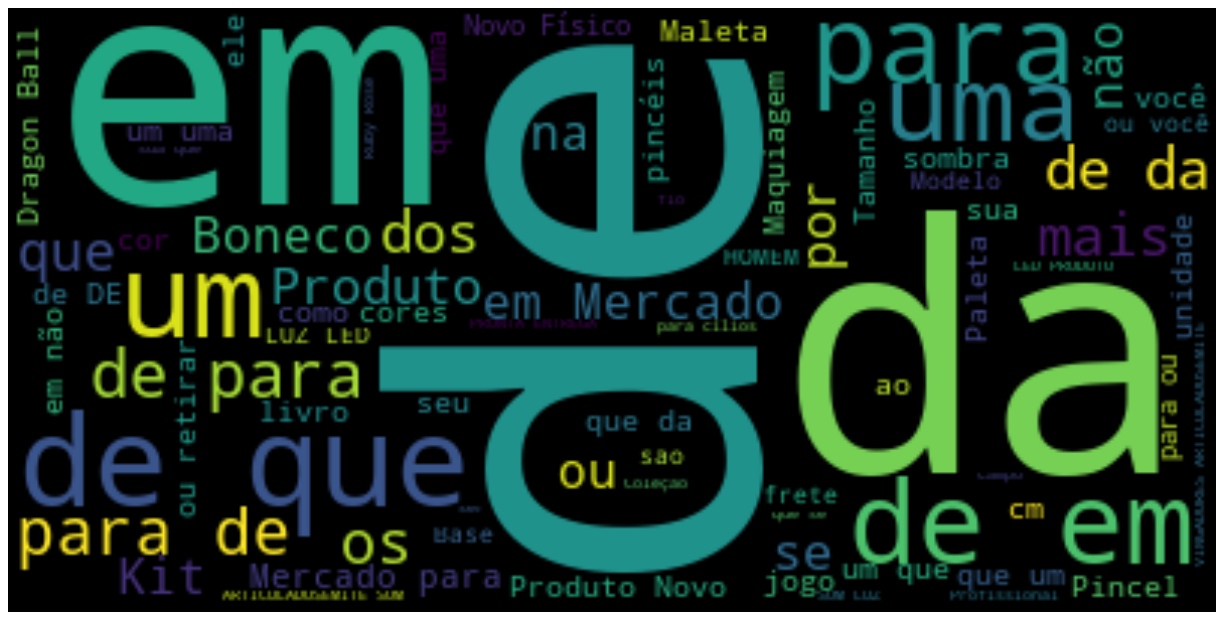

In [ ]:
figure(figsize=(20, 10), dpi=80)

plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()